### 0. 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터 불러오기

In [13]:
data_path = "/content/drive/MyDrive/team_project1/data/Regression_data.csv"

In [16]:
df = pd.read_csv(data_path)
df.shape

(4177, 9)

In [17]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


### 2. EDA

#### 2-1. 데이터 타입 확인 및 결측치 확인
- 결측치 없음
- Sex는 명목형, 나머지는 수치형 데이터

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


- Sex : 전복 성별
- Length : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게
- Rings(Target) : 전복 나이?

#### 2-2. Rings(target) -> 수치형(이산형)
- 최소값 1, 최대값 29
- 평균 9.93
- 박스플롯 상 이상치 존재하는 것으로 보임
- 왼쪽으로 살짝 치우쳐진 분포
- 불균형한 데이터

In [30]:
# 통계수치 확인
df['Rings'].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

<Axes: xlabel='Rings'>

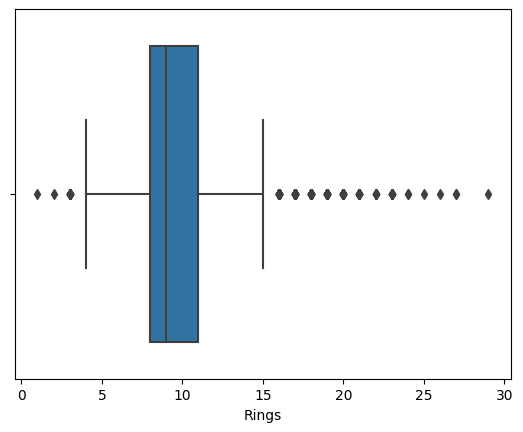

In [46]:
sns.boxplot(df, x='Rings')

<Axes: xlabel='Rings', ylabel='Count'>

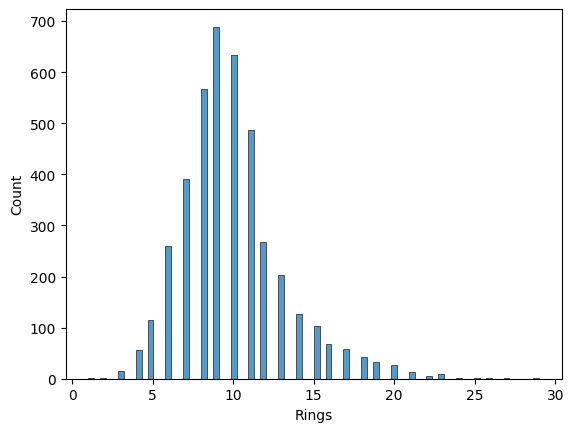

In [45]:
sns.histplot(df, x='Rings') # 왼쪽으로 살짝 치우쳐진 그래프

In [35]:
df['Rings'].value_counts() # 불균형 타겟

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [141]:
# 타겟과의 상관관계
df.corr()['Rings'].sort_values()

<ipython-input-141-8270d72b6f64>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Rings'].sort_values()


Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

#### 2-3. Sex -> 범주형(명목형)
- 데이터 분포가 균형을 이루는 편
- Sex 중 M, F와 달리 I는 Rings가 조금 다른 분포를 보임(평균값이 작음)

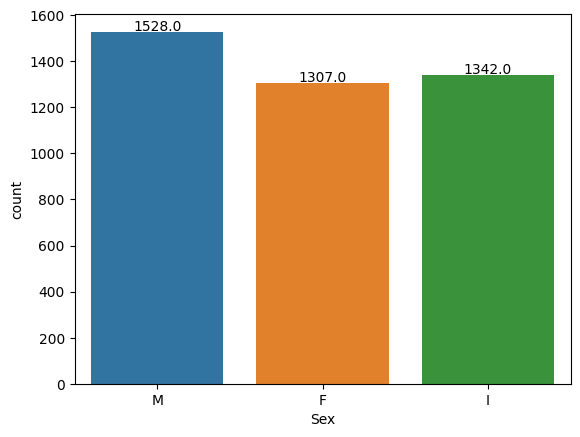

In [28]:
# 개수 확인
ax = sns.countplot(data=df, x='Sex')

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, height+5, height, ha='center')
plt.show()

<Axes: xlabel='Rings', ylabel='Sex'>

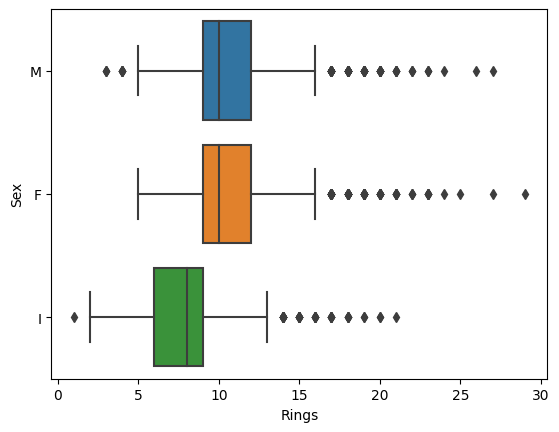

In [47]:
sns.boxplot(df, x='Rings', y='Sex')

#### 2-4. Length, Diameter, Height -> 수치형(연속형)
- 키가 0인 데이터가 2개 존재
- 세 변수 간의 상관계수가 높은 편이므로 키가 0인 데이터는 Length, Diameter 값을 활용해 채워주는 방식도 가능할듯
- Length, Diameter의 경우 0.2 이하에서 이상치 존재 -> 산점도로 봤을 때 이상치로 여기지 않아도 되지 않을까...
- Height의 경우 0.5 이상에서도 이상치 존재

In [64]:
# 통계자료
df[['Length', 'Diameter', 'Height']].describe()

,Length,Diameter,Height
count,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516
std,0.120093,0.099240,0.041827
min,0.075000,0.055000,0.000000
25%,0.450000,0.350000,0.115000
50%,0.545000,0.425000,0.140000
75%,0.615000,0.480000,0.165000
max,0.815000,0.650000,1.130000


In [76]:
# 키가 0인 데이터
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


Text(0, 0.5, 'Diameter')

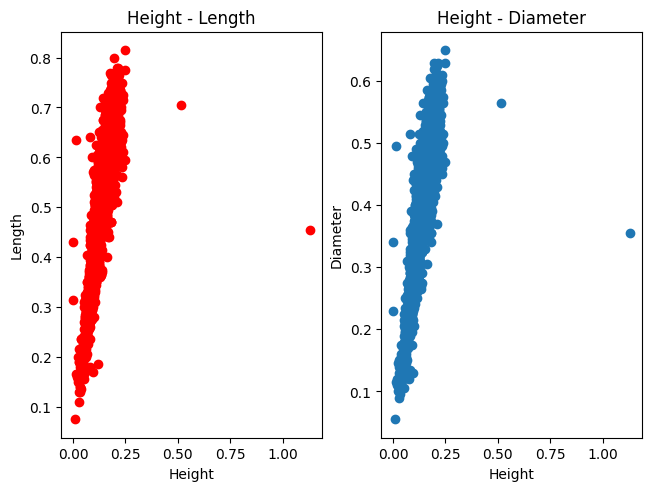

In [109]:
# 키와 두 변수 간의 연관성
fig, axes = plt.subplots(1, 2, constrained_layout=True)

axes[0].scatter(df['Height'], df['Length'], color='r')
axes[1].scatter(df['Height'], df['Diameter'])

axes[0].set_title("Height - Length")
axes[1].set_title("Height - Diameter")

axes[0].set_xlabel('Height')
axes[0].set_ylabel('Length')

axes[1].set_xlabel('Height')
axes[1].set_ylabel('Diameter')

Text(0, 0.5, 'Length')

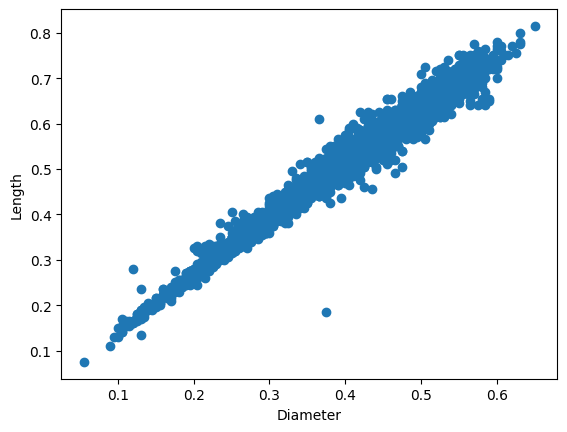

In [102]:
# diameter와 length 간의 연관성
plt.scatter(df['Diameter'], df['Length'])
plt.xlabel('Diameter')
plt.ylabel('Length')

In [77]:
# 세 변수 간의 상관계수
df[['Length', 'Diameter', 'Height']].corr()

,Length,Diameter,Height
Length,1.000000,0.986812,0.827554
Diameter,0.986812,1.000000,0.833684
Height,0.827554,0.833684,1.000000


<ipython-input-92-f02cdaf182e4>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(312)


<Axes: xlabel='Height'>

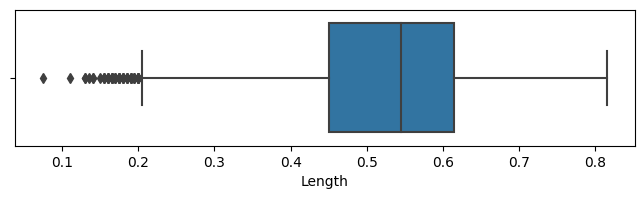

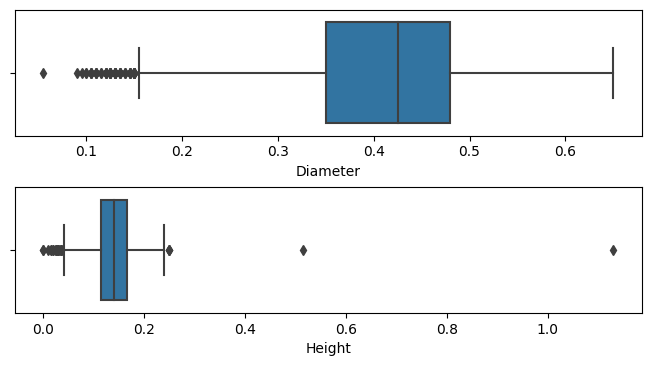

In [92]:
# 박스 그래프
plt.figure(figsize=(8, 6))
plt.subplot(311)
sns.boxplot(df, x='Length')
plt.subplots(constrained_layout=True)

plt.subplot(312)
sns.boxplot(df, x='Diameter')

plt.subplot(313)
sns.boxplot(df, x='Height')

Text(0, 0.5, 'Height')

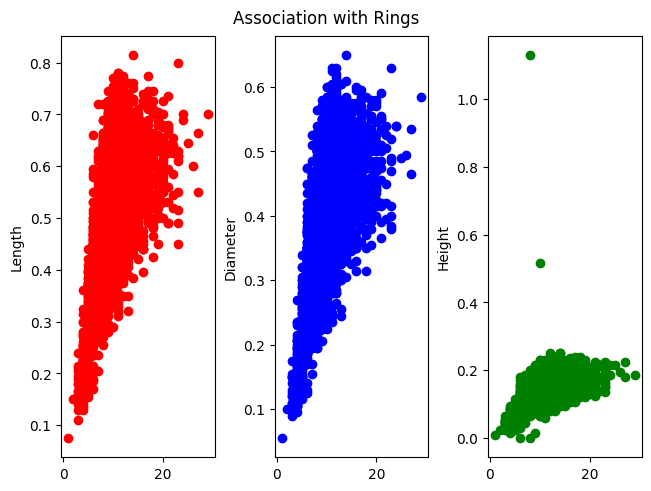

In [124]:
# 타겟과 세 변수 간의 연관성
fig, axes = plt.subplots(1, 3, constrained_layout=True)
fig.suptitle("Association with Rings")

axes[0].scatter(df['Rings'], df['Length'], color='r')
axes[1].scatter(df['Rings'], df['Diameter'], color='b')
axes[2].scatter(df['Rings'], df['Height'], color='g')

axes[0].set_ylabel('Length')
axes[1].set_ylabel('Diameter')
axes[2].set_ylabel('Height')

#### 2-5. Whole weight, Shucked weight, Viscera weight, Shell weight -> 수치형(연속형)

In [126]:
# 통계치 확인
df[['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']].describe()

,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.828742,0.359367,0.180594,0.238831
std,0.490389,0.221963,0.109614,0.139203
min,0.002000,0.001000,0.000500,0.001500
25%,0.441500,0.186000,0.093500,0.130000
50%,0.799500,0.336000,0.171000,0.234000
75%,1.153000,0.502000,0.253000,0.329000
max,2.825500,1.488000,0.760000,1.005000


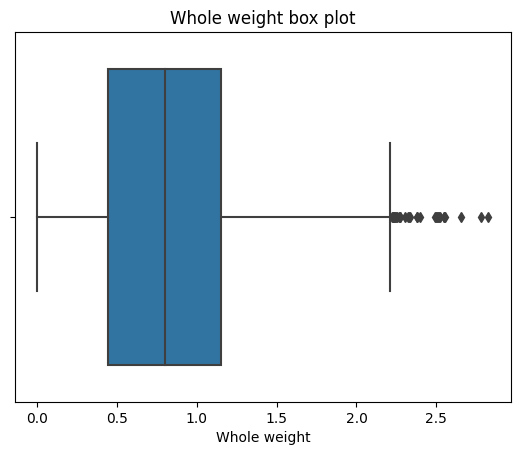

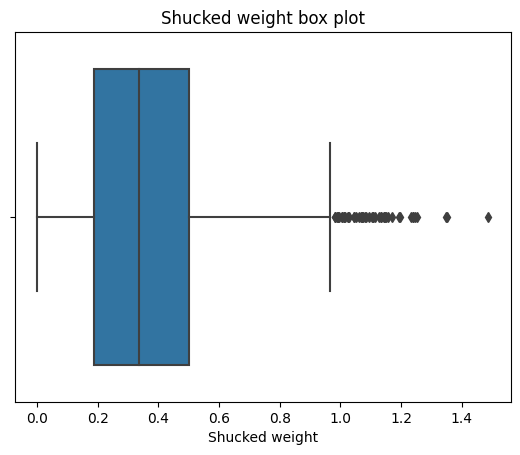

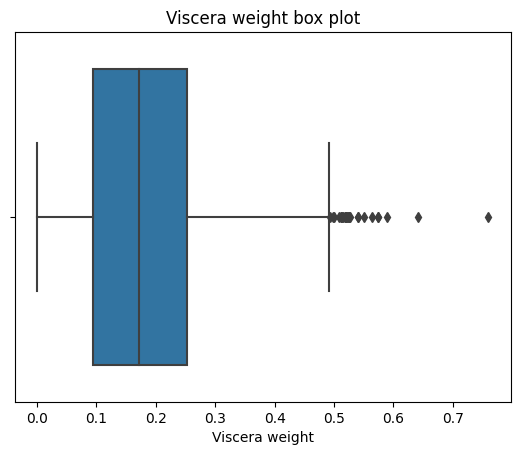

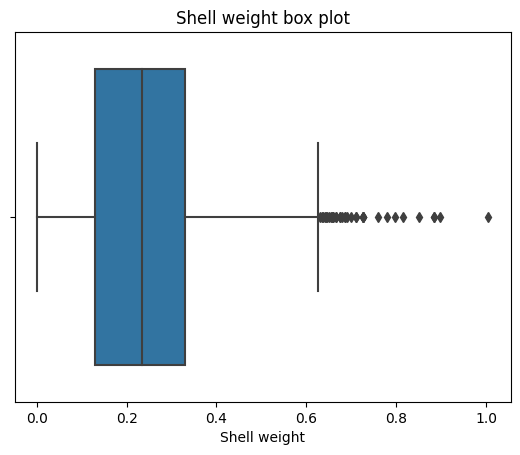

In [148]:
for column in df.columns[4:-1]:
  plt.title(f'{column} box plot')
  sns.boxplot(df, x = column)
  plt.show()

In [131]:
# 전체 무게 - 껍질 무게 = 껍질을 제외한 무게 -> 왜 다 다르지?
df[df['Shucked weight'] == df['Whole weight'] - df['Shell weight']]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


<Axes: xlabel='Whole weight', ylabel='Rings'>

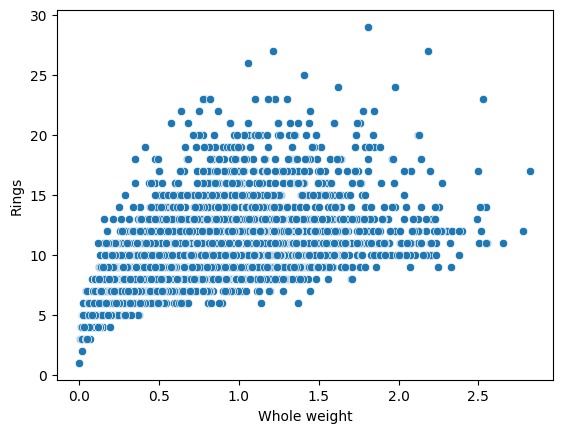

In [144]:
# 전체 무게와 타겟 간의 관계
sns.scatterplot(df, x='Whole weight', y='Rings')